In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [2]:
def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)
        print("Request granted")
    
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
filename = "laptops.csv"
download(url, filename)

Request granted


In [3]:
# imports file into a pandas data frame
df = pd.read_csv(filename, header=0)

In [4]:
# prints the first 5 entries
df.head(5)

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [5]:
# TASK 1.
# Generate regression plots for each of the parameters "CPU_frequency",
# "Screen_Size_inch" and "Weight_pounds" against "Price".
# Also, print the value of correlation of each feature with "Price"


(0.0, 3974.15)

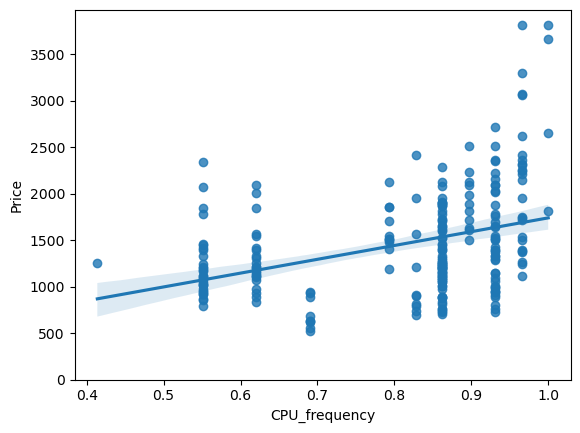

In [6]:
# Regression plot for CPU_frequency against Price
sns.regplot(x= "CPU_frequency", y= "Price", data =df)
plt.ylim(0,)

(0.0, 3974.15)

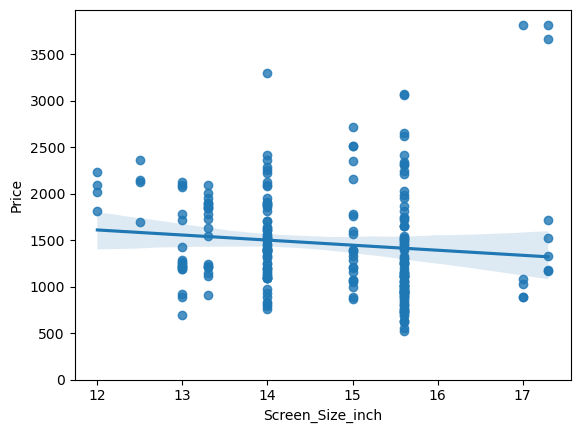

In [7]:
# Regression plot for Screen_Size_inch against Price
sns.regplot(x='Screen_Size_inch', y='Price', data = df)
plt.ylim(0,)

(0.0, 3974.15)

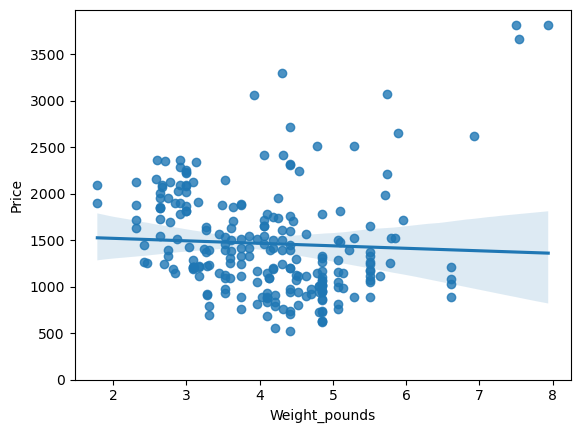

In [8]:
# Regression plot for Weight_pounds against Price
sns.regplot(x='Weight_pounds', y='Price', data=df)
plt.ylim(0,)

In [9]:
# for loop showing the correlation values of the three attributes with Price

for param in ['CPU_frequency', 'Screen_Size_inch', 'Weight_pounds']:
    print(f"Correlation of Price and {param} is ", df[[param,"Price"]].corr())

Correlation of Price and CPU_frequency is                 CPU_frequency     Price
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000
Correlation of Price and Screen_Size_inch is                    Screen_Size_inch     Price
Screen_Size_inch          1.000000 -0.110644
Price                    -0.110644  1.000000
Correlation of Price and Weight_pounds is                 Weight_pounds     Price
Weight_pounds       1.000000 -0.050312
Price              -0.050312  1.000000


In [10]:

# Interpretation: "CPU_frequency" has a 36% positive correlation with the price of the laptops. 
# The other two parameters have weak correlation with price.


In [11]:
# CATEGORICAL FEATURES
# Generate Box plots for the different feature that hold categorical values.


<Axes: xlabel='Category', ylabel='Price'>

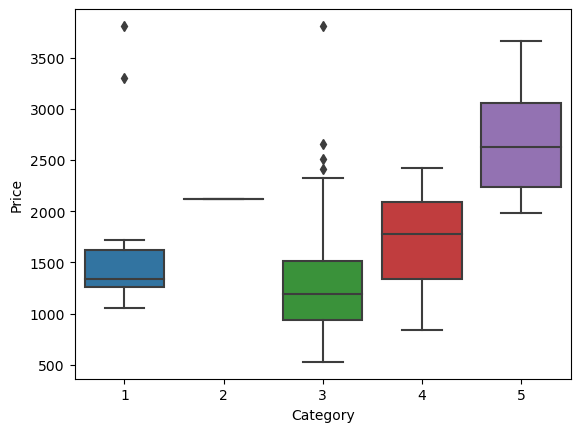

In [12]:
# Category box plot
sns.boxplot(x = 'Category', y = 'Price' , data=df)

<Axes: xlabel='GPU', ylabel='Price'>

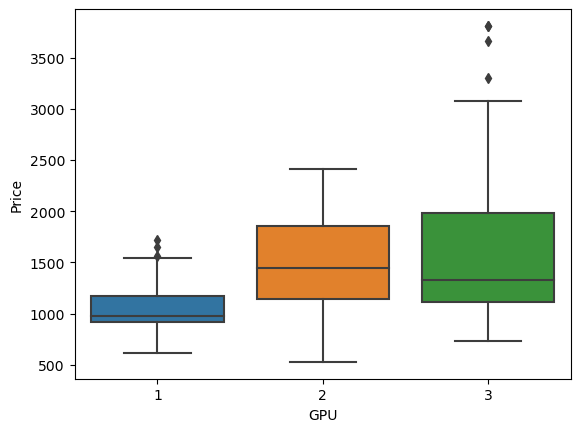

In [13]:
# GPU Box plot
sns.boxplot(x='GPU', y= 'Price', data=df)

<Axes: xlabel='OS', ylabel='Price'>

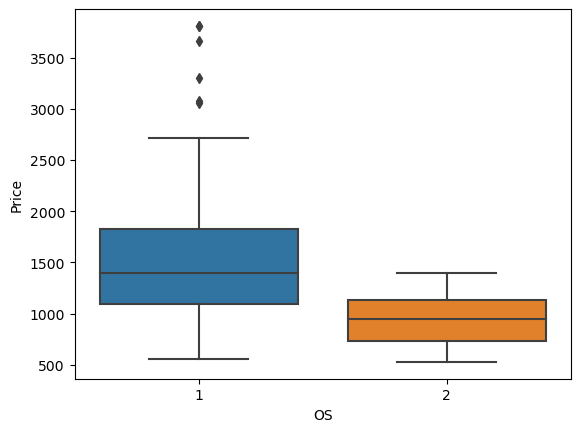

In [14]:
# OS Box plot
sns.boxplot(x= 'OS', y = 'Price', data = df)

<Axes: xlabel='CPU_core', ylabel='Price'>

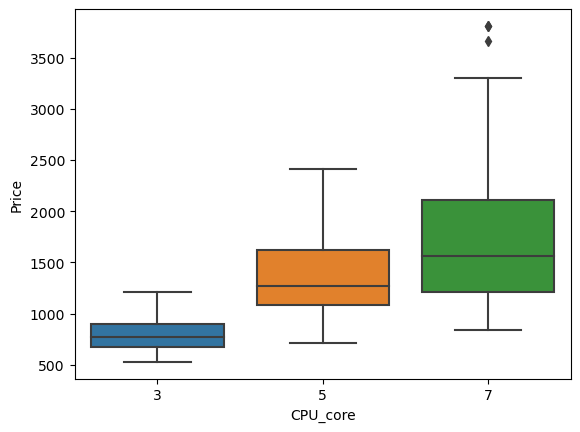

In [15]:
# CPU_core Box plot
sns.boxplot(x='CPU_core', y='Price', data=df)

<Axes: xlabel='RAM_GB', ylabel='Price'>

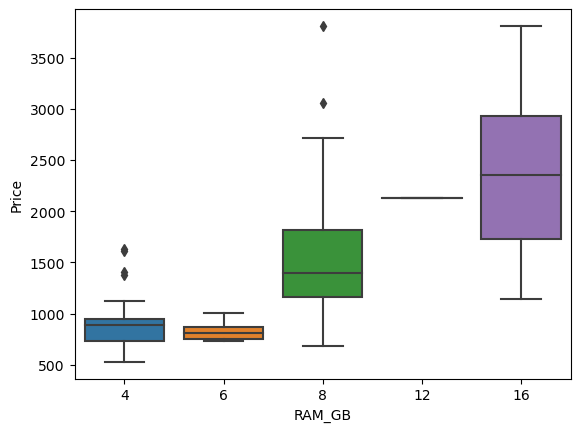

In [16]:
# RAM_GB Box plot
sns.boxplot(x='RAM_GB', y='Price', data=df)

<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

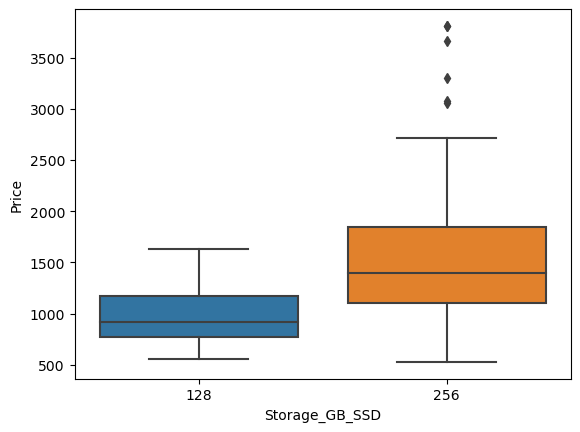

In [17]:
# Storage_GB_SSD Box plot
sns.boxplot(x='Storage_GB_SSD', y='Price', data=df)

In [18]:
# TASK 2.
# Generate the statistical description of all the features being used in the dataset. Include 'object" data types as well.
print(df.describe())
print(df.describe(include=['object']))


       Unnamed: 0.1  Unnamed: 0    Category         GPU          OS  \
count    238.000000  238.000000  238.000000  238.000000  238.000000   
mean     118.500000  118.500000    3.205882    2.151261    1.058824   
std       68.848868   68.848868    0.776533    0.638282    0.235790   
min        0.000000    0.000000    1.000000    1.000000    1.000000   
25%       59.250000   59.250000    3.000000    2.000000    1.000000   
50%      118.500000  118.500000    3.000000    2.000000    1.000000   
75%      177.750000  177.750000    4.000000    3.000000    1.000000   
max      237.000000  237.000000    5.000000    3.000000    2.000000   

         CPU_core  Screen_Size_inch  CPU_frequency      RAM_GB  \
count  238.000000        238.000000     238.000000  238.000000   
mean     5.630252         14.688655       0.813822    7.882353   
std      1.241787          1.166045       0.141860    2.482603   
min      3.000000         12.000000       0.413793    4.000000   
25%      5.000000         14.0

In [19]:

# TASK 3.
# Group the parameters "GPU", "CPU_core" and "Price" to make a pivot table
# and visualize this connection using the pcolor plot.


In [20]:
df_test = df[["GPU", "CPU_core", "Price"]]
df_grp1 = df_test.groupby(['GPU','CPU_core'], as_index = False).mean()
df_grp1

,GPU,CPU_core,Price
0,1,3,769.250000
1,1,5,998.500000
2,1,7,1167.941176
3,2,3,785.076923
4,2,5,1462.197674
5,2,7,1744.621622
6,3,3,784.000000
7,3,5,1220.680000
8,3,7,1945.097561


In [21]:
df_pivot = df_grp1.pivot(index='GPU',columns = 'CPU_core')
df_pivot

Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561

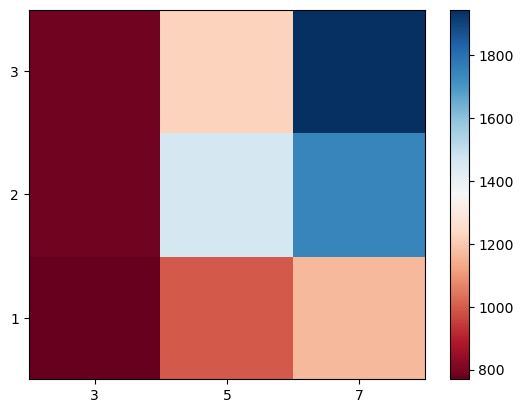

In [22]:
fig, ax = plt.subplots()
im = ax.pcolor(df_pivot, cmap='RdBu')

# label names
row_labels = df_pivot.columns.levels[1]
col_labels = df_pivot.index

# move ticks and labels to the center
ax.set_xticks(np.arange(df_pivot.shape[1]) + 0.5, minor = False)
ax.set_yticks(np.arange(df_pivot.shape[0]) + 0.5, minor = False)

# insert labels
ax.set_xticklabels(row_labels, minor = False)
ax.set_yticklabels(col_labels, minor = False)


plt.colorbar(im)
plt.show()

In [23]:

# TASK 4.
# Use the scipy.stats.pearsonr() funtion to evaluate the Pearson Coefficient and the
# p-values for each parameter tested above.

for param_pearson in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
    pearson_coef, p_value = stats.pearsonr(df[param_pearson], df['Price'])
    print(param_pearson)
    print("The Pearson Correlation Coefficient for ", param_pearson, "is", pearson_coef, " with a P-value of p = ", p_value)

RAM_GB
The Pearson Correlation Coefficient for  RAM_GB is 0.5492972971857841  with a P-value of p =  3.6815606288429613e-20
CPU_frequency
The Pearson Correlation Coefficient for  CPU_frequency is 0.36666555892588604  with a P-value of p =  5.5024633507134225e-09
Storage_GB_SSD
The Pearson Correlation Coefficient for  Storage_GB_SSD is 0.24342075521810294  with a P-value of p =  0.00014898923191724174
Screen_Size_inch
The Pearson Correlation Coefficient for  Screen_Size_inch is -0.11064420817118267  with a P-value of p =  0.08853397846830766
Weight_pounds
The Pearson Correlation Coefficient for  Weight_pounds is -0.05031225837751549  with a P-value of p =  0.43976938534338944
CPU_core
The Pearson Correlation Coefficient for  CPU_core is 0.45939777733551157  with a P-value of p =  7.912950127009034e-14
OS
The Pearson Correlation Coefficient for  OS is -0.2217298011482738  with a P-value of p =  0.0005696642559246749
GPU
The Pearson Correlation Coefficient for  GPU is 0.2882981988881428  